# Supercon v2 YBCO Structure Exploration
---

This notebook uses the cleaned supercon v2 dataset. The original data can be downloaded [here]()

In [1]:
from sctk.databases import MaterialsProject, COD
from sctk.materials import Material, Superconductor
from sctk.structure import StructurePhaseDiagram
from sctk.notebook import init_notebook

init_notebook()

## Construct YBCO Structure Phase Diagram:

In [2]:
spd = StructurePhaseDiagram(Superconductor('YBCO'))

with MaterialsProject() as db:
    spd.add_database_structures(db)

/home/colin/.local/lib/python3.10/site-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/21 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/21 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/21 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/11 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/11 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/11 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/37 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/37 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/37 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/21 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/21 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/21 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/25 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/25 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/25 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/22 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/22 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/22 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/29 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/29 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/29 [00:00<?, ?it/s]

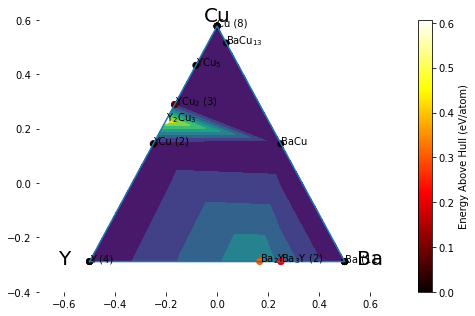

In [7]:
import matplotlib.pyplot as plt
from sctk.materials import Superconductor
%matplotlib inline

plt.figure('Phase Diagram',figsize=(8,5))
ax = plt.subplot(111)
ax = spd.plot(['Y', 'Ba', 'Cu'], ax=ax, 
              subset_only=True, show_ehull=True)
plt.show()

In [4]:
import numpy as np
ybco_base = Superconductor('Y-123', canonical_variables=True)
ybcos = [ 
    ybco_base.copy().substitute('δ', x) 
    for x in np.linspace(0.0, 1.0, 5)
]

for ybco in ybcos:
    match, match_atoms = spd.find_closest_structure(ybco, metric='composition', max_ehull=0.1)
    print(f'Found match {match.str()} for {ybco.str()}')

Found match Ba₂YCu₃O₇ for YBa₂Cu₃O₇.₀
Found match Ba₈Y₄(Cu₄O₉)₃ for YBa₂Cu₃O₆.₇₅
Found match Ba₄Y₂Cu₆O₁₃ for YBa₂Cu₃O₆.₅
Found match Ba₁₀Y₅Cu₁₅O₃₂ for YBa₂Cu₃O₆.₂₅
Found match Ba₂Y(CuO₂)₃ for YBa₂Cu₃O₆.₀


In [8]:
from sctk.structure import DefectSupercellBuilder
from ase.visualize import view
from ase.build import find_optimal_cell_shape, make_supercell

In [16]:
sc = Superconductor('YBCO')
_, sc_atoms = spd.find_closest_structure(sc)

dsb = DefectSupercellBuilder(sc_atoms)
dsb.set_supercell_matrix(np.diag([1,1,1]))
dsb.add_substitution('Ca', 'Ba', 1)

sc_supercell = dsb.get()

#P = find_optimal_cell_shape(sc_atoms.cell,4,'fcc')
#sc_supercell = make_supercell(sc_atoms, P)
view(sc_supercell)

<Popen: returncode: None args: ['/usr/bin/python3', '-m', 'ase', 'gui', '-']>